In [1]:
import numpy as np
import torch
from tuned_lens.nn.lenses import TunedLens, LogitLens
from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import load_dataset
import matplotlib.pyplot as plt
from tuned_lens.plotting import PredictionTrajectory
from tqdm import tqdm

from joblib import Parallel, delayed
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

from dadapy import data
from dadapy.data import Data
import scipy

from scipy import stats
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

import matplotlib.colors as mcolors
hex6 = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']
colors6=[mcolors.to_rgb(i) for i in hex6]
from scipy.spatial.distance import pdist, squareform
import tempfile

In [3]:
ds = load_dataset("NeelNanda/pile-10k")['train']
filtered_indices = np.load('filtered_indices.npy')
subset_indices = np.load('subset_indices.npy')


In [4]:
test_indx = 686;
device = torch.device('cuda');
max_length = 256
ds['meta'][filtered_indices[test_indx]]

{'pile_set_name': 'ArXiv'}

In [5]:
test_indx = 686;
device = torch.device('cuda');
max_length = 256
test_sequence = ds['text'][filtered_indices[test_indx]]
steps = ["step4", "step16", "step64", "step256", "step1000", "step4000", "step16000", "step64000",  "step143000"]
models = {}
all_logits, all_probs = [], []
for step in steps:
    with tempfile.TemporaryDirectory() as temp_dir:
        model_name = "EleutherAI/pythia-160m-deduped"
        revision = step
        if step == "final":
            model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto", local_files_only=False, cache_dir=temp_dir)  
            tokenizer = AutoTokenizer.from_pretrained(model_name, cache_dir=temp_dir, local_files_only=False)  # Assuming same tokenizer for all
        else:
            model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto", revision = revision, local_files_only=False, cache_dir=temp_dir)  
            tokenizer = AutoTokenizer.from_pretrained(model_name, revision = revision, cache_dir=temp_dir, local_files_only=False)  # Assuming same tokenizer for all
        
        input_ids = tokenizer.encode(test_sequence.strip(), add_special_tokens = False, \
                         return_tensors = "pt", max_length = max_length, truncation = True).to(device)
        outputs = model(input_ids, output_hidden_states=True)
        logits = outputs.logits.squeeze()
        probs = torch.nn.functional.softmax(logits, dim = -1)
        all_logits.append(logits)
        all_probs.append(probs)
        # ids, losses = extract_ids_and_losses(sequences, model, tokenizer, max_length = 1024)
        # all_ids.append(ids)
        # all_losses.append(losses)
        # np.save(f'pythia_checkpoints/ids/{step}.npy', ids)
        # np.save(f'pythia_checkpoints/losses/{step}.npy', losses)

config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/375M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/375M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/375M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/375M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/375M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/375M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/375M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/375M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/375M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

In [6]:
def calculate_moments(all_logits, all_probs):
    all_probs_com = []
    all_logits_com = []
    n_layers = len(all_logits)
    all_entropies = []
    with torch.no_grad():
        for idx in range(n_layers):
            logits, probs = all_logits[idx], all_probs[idx] + 1e-12
            probs_com = torch.mean(probs, axis = -2).squeeze()
            all_probs_com.append(probs_com)
            logits_com = torch.log(probs_com)
            logits_com_mean = torch.sum(probs_com * logits_com)
            all_logits_com.append(logits_com - logits_com_mean)
            all_entropies.append(-(probs*torch.log(probs)).sum(axis = -1).cpu().detach().numpy())
        
        all_probs_com = torch.stack(all_probs_com, axis = 0)
        all_logits_com = torch.stack(all_logits_com, axis = 0)
    all_cumulants = []
    with torch.no_grad():
        for idx in range(n_layers):
            delta_logits = all_logits_com[idx] - all_logits[idx]
            centered_delta_logits = delta_logits - (all_probs[idx] * delta_logits).sum(axis = -1, keepdims = True)
            m1 = (all_probs[idx] * (centered_delta_logits)).sum(axis = -1)
            m2 = (all_probs[idx] * (centered_delta_logits**2)).sum(axis = -1)
            m3 = (all_probs[idx] * (centered_delta_logits**3)).sum(axis = -1)
            m4 = (all_probs[idx] * (centered_delta_logits**4)).sum(axis = -1)
            m5 = (all_probs[idx] * (centered_delta_logits**5)).sum(axis = -1)
            m6 = (all_probs[idx] * (centered_delta_logits**6)).sum(axis = -1)
            m7 = (all_probs[idx] * (centered_delta_logits**7)).sum(axis = -1)
            m8 = (all_probs[idx] * (centered_delta_logits**8)).sum(axis = -1)
            
            # print(variance.shape)
            k2 = torch.mean(m2)
            k3 = torch.mean(m3)
            k4 = torch.mean(m4 - 3*m2**2)
            k5 = torch.mean(m5 - 10*m2*m3)
            k6 = torch.mean(m6 - 15*m2*m4 - 10 * m3 **2 + 30 * m2**3)
            k7 = torch.mean(m7 - 21 * m2 * m5 - 35 * m3 * m4 + 210* (m2**2) * m3)
            k8 = torch.mean(m8 - 28 * m2 * m6 - 56 * m3 * m5 + 420 * m2**2 * m4 - 35 * m4 * m4 + 560 * m2 * m3 * m3 - 630 * m2**4)
    #         cumulant5 = (moments[5] - 10 * moments[3]*moments[2]).mean()
            
            all_cumulants.append(torch.stack([k2, k3, k4, k5, k6, k7, k8]))
    return all_cumulants, all_probs_com

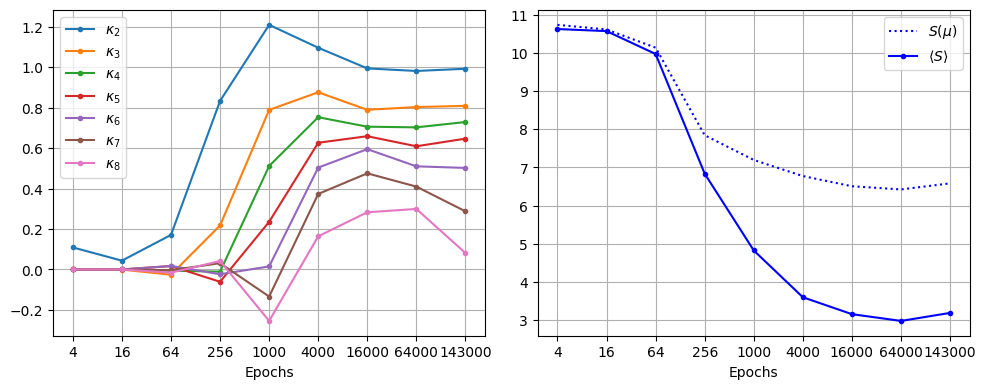

In [18]:
all_cumulants, all_probs_com = calculate_moments(all_logits, all_probs)
entropy = -torch.sum(all_probs_com * torch.log(all_probs_com + 1e-12), axis = -1).cpu().detach().numpy()
all_cumulants_np = torch.stack(all_cumulants).cpu().detach().numpy()/np.array([2, 6, 24, 120, 720, 5040, 40320])
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
ax = axes[0]
for idx in range(7):
    # print(len(all_cumulants_np.T[idx]), all_cumulants_np.T[idx])
    ax.plot(all_cumulants_np.T[idx], marker = '.', label =f'$\kappa_{{{idx + 2}}}$')
# plt.plot(np.array(all_entropies).mean(axis = -1), marker = '.', c = 'black', linestyle = '-')
#plt.axvline(16, c = 'red', linestyle = 'dotted')
#plt.title(topic)
ax.grid(True)
ax.legend()
ax.set_xlabel('Epochs')

ax.set_xticks([idx for idx in range(9)], [int(step[4:]) for step in steps])
all_entropies= []
for idx in range(len(all_logits)):
    # print("Hi")
    logits, probs = all_logits[idx], all_probs[idx].cpu().detach().numpy()
    all_entropies.append(-(probs*np.log(probs + 1e-12)).sum(axis = -1).mean())
ax = axes[1]
ax.plot(entropy, c = 'blue', linestyle = 'dotted',label = "$S(\mu)$")
ax.plot(all_entropies, marker = '.', c = 'blue', label = "$\langle S \\rangle$")
ax.grid(True)
ax.set_xlabel('Epochs')

ax.set_xticks([idx for idx in range(9)], [int(step[4:]) for step in steps])
ax.legend()
handles_psim, labels_psim = axes[0].get_legend_handles_labels()
#fig.legend(handles_psim, labels_psim, loc='upper center', bbox_to_anchor=(0.5, -0.0), ncol = 4,  fontsize = "x-large")
plt.tight_layout()

plt.show()

## Tuned lens

In [31]:
device

device(type='cuda')

In [71]:
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-160m-deduped').to(device)
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-160m-deduped')
tuned_lens = TunedLens.from_model_and_pretrained(model)
tuned_lens = tuned_lens.to(device)
def shuffle_tokens(ids, shuffle_index):
    N, K = ids.shape[-1], 4**shuffle_index
    block_size = N//K
    permutation = np.random.permutation(K)
    new_ids = ids.reshape((1, K, block_size))
    new_ids = new_ids[0, permutation, :]
    new_ids = new_ids.reshape(1, N)
    return new_ids
    
def get_logits(test_sequence, max_length = 256, lens = tuned_lens, shuffle_indx = 0):
    input_ids = tokenizer.encode(test_sequence.strip(), add_special_tokens = False, \
                         return_tensors = "pt", max_length = max_length, truncation = True)
    # if shuffled:
    input_ids = shuffle_tokens(input_ids, shuffle_indx).to(device)
    all_logits = []
    all_probs = []
    with torch.no_grad():
        # input_ids_th = torch.tensor(input_ids.clone().detach(), dtype=torch.int64, device=model.device)
        input_ids_th = input_ids.clone().detach().to(device)
        outputs = model(input_ids_th, output_hidden_states=True)
        stream = list(outputs.hidden_states)
        # Create the stream of log probabilities from the lens
        for i, h in enumerate(stream[:-1]):
            # print(h.device)
            logits = lens.forward(h, i).squeeze()
            probs = torch.nn.functional.softmax(logits, dim = -1)
            all_logits.append(logits)
            all_probs.append(probs)
        all_logits.append(outputs.logits.squeeze())
        all_probs.append(torch.nn.functional.softmax(outputs.logits.squeeze(), dim = -1))
        return all_logits, all_probs

config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

params.pt:   0%|          | 0.00/28.4M [00:00<?, ?B/s]

(…)eutherAI/pythia-160m-deduped/config.json:   0%|          | 0.00/179 [00:00<?, ?B/s]

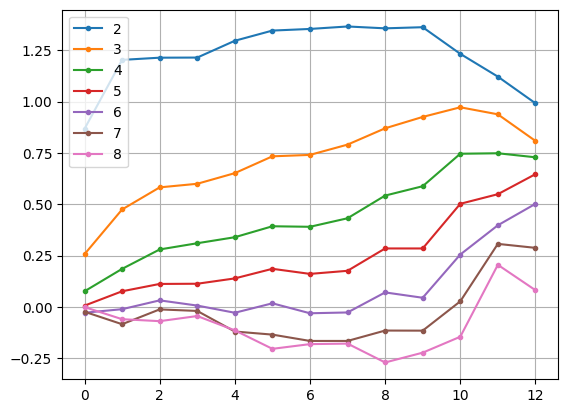

In [72]:
all_tuned_logits, all_tuned_probs = get_logits(test_sequence, max_length = max_length, shuffle_indx = 0)
all_cumulants, all_probs_com = calculate_moments(all_tuned_logits, all_tuned_probs)
entropy = -torch.sum(all_probs_com * torch.log(all_probs_com + 1e-12), axis = -1).cpu().detach().numpy()
all_cumulants_np = torch.stack(all_cumulants).cpu().detach().numpy()/np.array([2, 6, 24, 120, 720, 5040, 40320])
for idx in range(7):
    plt.plot(all_cumulants_np.T[idx], marker = '.', label = idx + 2)
# plt.plot(np.array(all_entropies).mean(axis = -1), marker = '.', c = 'black', linestyle = '-')
# ax.axvline(16, c = 'red', linestyle = 'dotted')
# ax.set_title(f"{prompt_indx}, {topic}")
# shuffled = "Shuffled" if shuffle_indx > 0 else "Structured"
#ax.set_title(shuffled)
plt.grid(True)
plt.legend()